# A/B Testing of Themes using Python

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

In [3]:
# importing and reading dataset using pandas

data = pd.read_csv("./website_ab_test.csv")
data.head(5)

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [4]:
# Lets see if data has nulls

data.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

Here we can see there are no Null Values

In [5]:
# Lets see some info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [6]:
# Lets Describe the data

data.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [7]:
# Now lets see description of all the columns:

# Theme : Light or Dark Theme
# Click Through Rate : Proportion of users clicked on links or  buttons on websites
# Conversion Rate : Percentage of users who signed UP after visiting first Time
# Bounce Rate : Proportion of users who leaved the website before further interaction
# Scroll_Depth : The depth through which users scroll through website pages.
# Age : The age of the user
# Location : Location of the user accessing website
# Session_Duration : Duration of users session on website.
# Purchases : Whether user purchased book or not (Yes/No).
# Added_to_Cart : Whether the user added the book to cart or not (Yes/No).

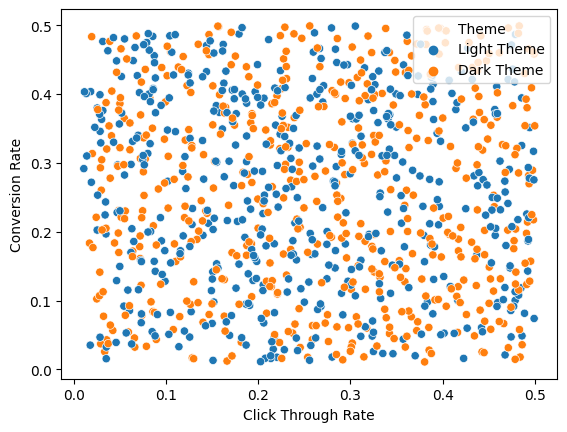

In [8]:
# Conversion Rate means daily percentage of users who signed Up to website. 
# Lets have a relationship between CTR (click Through Rate) and Conversion Rate

# Scatter plot for CTR and conversion Rate

sns.scatterplot(data=data,x=data['Click Through Rate'],y=data['Conversion Rate'],hue='Theme')

plt.show()

This shows the relation between CTR and Conversion rate is nearly consistent that means nearly all the users visiting website endup sigingup daily.

In [9]:
# Extract data for each Theme separately

light_theme_data = data[data['Theme'] == 'Light Theme']
dark_theme_data = data[data['Theme'] == 'Dark Theme']



In [10]:
# Create grouped bar chart for Click Through Rate 

fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Click Through Rate'],name = 'Light Theme',opacity = 0.6))
fig.add_trace(go.Histogram(x=dark_theme_data['Click Through Rate'],name = 'Dark Theme',opacity = 0.6))

fig.update_layout(
    title_text = 'Click Through Rate By Theme',
    xaxis_title_text = 'Click Through Rate',
    yaxis_title_text = 'Frequency',
    barmode = 'group',
    bargap = 0.1
)
fig.show()


There no much difference between CTR for both the themes.

In [11]:
# Lets have a look at Conversion rate 

fig = go.Figure()

fig.add_trace(go.Histogram(x=light_theme_data['Conversion Rate'],name = 'Light Theme',opacity = 0.6,nbinsx=20))
fig.add_trace(go.Histogram(x=dark_theme_data['Conversion Rate'],name = 'Dark Theme',opacity = 0.6,nbinsx=20))

fig.update_layout(
    title_text = 'Conversion Rate By Theme',
    xaxis_title_text = 'Conversion Rate',
    yaxis_title_text = 'Frequency',
    barmode = 'group',
    bargap = 0.1
)
fig.show()

There is no much difference , Conversion rate of Dark Theme is slightly better that Light Theme

In [14]:
# Lets see the Distribution of bounce rate for both themes

fig = go.Figure()

fig.add_trace(go.Box(y=light_theme_data['Bounce Rate'],name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Bounce Rate'],name='Dark Theme'))

fig.update_layout(
    title_text = "Bounce Rate by Theme",
    yaxis_title_text = "Bounce Rate"
)

fig.show()

Bounce Rate for Light Theme is lower i.e It is slightly better than Dark Theme.

In [15]:
# Now Lets see the Scroll Depth for both Themes

fig = go.Figure()

fig.add_trace(go.Box(y=light_theme_data['Scroll_Depth'],name='Light Theme'))
fig.add_trace(go.Box(y=dark_theme_data['Scroll_Depth'],name='Dark Theme'))

fig.update_layout(
    title_text = "Scroll Dept by Theme",
    yaxis_title_text = "Scroll Dept"
)


fig.show()


Here we can see scroll dept of light theme is slightly better than Dark theme

In [24]:
# Comparing Both Themes based on Purchase
# Now We will perform A/B Test for Purchase

light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

In [25]:
conversion_counts = [light_theme_conversions,dark_theme_conversions]
conversion_counts

[258, 259]

In [26]:
sample_sizes = [light_theme_total,dark_theme_total]
sample_sizes

[486, 514]

In [27]:
# Calculate conversion rate for both themes

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total

In [31]:
# Perform two-sample proportion test

zstat,pval = proportions_ztest(conversion_counts,sample_sizes)

print(f"Light Theme Conversion Rate: {light_theme_conversion_rate}")
print(f"Dark Theme Conversion Rate: {dark_theme_conversion_rate}")

print(f"A/B Testing - z-statistic: {zstat} ,P-value: {pval} ")

Light Theme Conversion Rate: 0.5308641975308642
Dark Theme Conversion Rate: 0.5038910505836576
A/B Testing - z-statistic: 0.8531246206222649 ,P-value: 0.39359019934127804 


The Result of A/B Test are as follows : 
z-stat = 0.8532
p-value = 0.3936

looking at the z-stat value 0.8532 which is positive and this positive value indicates that conversion rate of light theme is slightly higher than Dark Theme.

p-value indicates the probability of observed difference in conversion rates or more extreme difference if null hypothesis is true.
Null Hypothesis assume there is no statistically significant difference between the two themes.

In this case the p-value 0.3936 , which is greater than the typical significance leve of 0.05 (commonly used for A/B testing).We do not have enough evidence to reject null hypothesis. This means the observed difference in Conversion rates is not statistically significant.

The result indicates, based on current data and analysis we cannot say that one theme performs better than other in terms of purchases.

In [33]:
# Comparing Both Themes based on session duration

light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

#calculating average of session durations
light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

print(f"Ligh Theme Average Duration : {light_theme_avg_duration}")
print(f"Dark Theme Average Duration : {dark_theme_avg_duration}")



Ligh Theme Average Duration : 930.8333333333334
Dark Theme Average Duration : 919.4824902723735


In [34]:
# perform two sample t-test for session duration

tstat , pval = stats.ttest_ind(light_theme_session_duration,dark_theme_session_duration)

print(f"A/B testing for session duration- t-statistic : {tstat} , p-value : {pval}")

A/B testing for session duration- t-statistic : 0.3528382474155483 , p-value : 0.7242842138292167


The Result for A/B test are as follows:
t-statistic = 0.3528
p-value = 0.7242

The t-statistic value indicates the average difference between the two themes ,considering the variability in the dataset.
Here the Positive t-stat value indicates the average session duration for Light Theme is Slightly Higher than the Dark Theme.

p-value indicates the probability of observed difference in average session durations or more extreme difference if null hypothesis is true.
Null Hypothesis assume there is no statistically significant difference between the two themes.

In this case the p-value 0.7242 , which is greater than the typical significance leve of 0.05 (commonly used for A/B testing).We do not have enough evidence to reject null hypothesis. This means the observed difference in average session duration is not statistically significant.

The results suggest that any observed difference in session duration could be due to random variation rather than a true difference caused by the themes.

The result indicates, based on current data and analysis we cannot say that one theme performs better than other in terms of session Duratio.



Summary:

So this is how you can perform A/B testing of themes or designs using Python. A/B testing is a powerful and widely used technique to compare and evaluate marketing strategies, designs, layouts, or themes. The primary purpose of A/B testing is to make data-driven decisions that lead to improved user experiences, enhanced performance metrics, and ultimately better business outcomes. 